In [16]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
from spectres import spectres
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from extinction import ccm89, apply, remove
from extinction import fitzpatrick99 as f99

In [17]:
def read_table(path):
    tab=Table.read(path,format='ascii')
    
    lam=np.array(tab['col1'])
    spec=np.array(tab['col2'])
    
    return lam,spec

def read_table_snid(path):
    tab=Table.read(path,format='ascii')
    
    lam=np.array(tab['wavelength[A]'])
    spec=np.array(tab['flux[arbitraty]'])
    
    return lam,spec

In [18]:
def restframe(lam,spec,z):
    #Spectra in the restframe
    lam_res=lam/(1+z)
    flux_res=spec*(1+z)
    
    return lam_res, flux_res

In [19]:
def color_type(tipo):
    lw=1
    
    if tipo=='Ia':
        color='#D81B60'
    elif tipo=='Ib':
        color='#1E88E5'
    elif tipo=='Ic-BL':
        color='#FFC107'
    elif tipo=='II':
        color='#004D40'
    else:
        color='#000000'
        
    return lw,color

In [20]:
def mw_extinction_correction(lam,flux,ebv):
    flux=remove(f99(lam,3.1*ebv,3.1),flux)
    #eflux=remove(f99(lam,3.1*ebv,3.1),eflux)
    
    return flux#,eflux

# SNID Comparisons

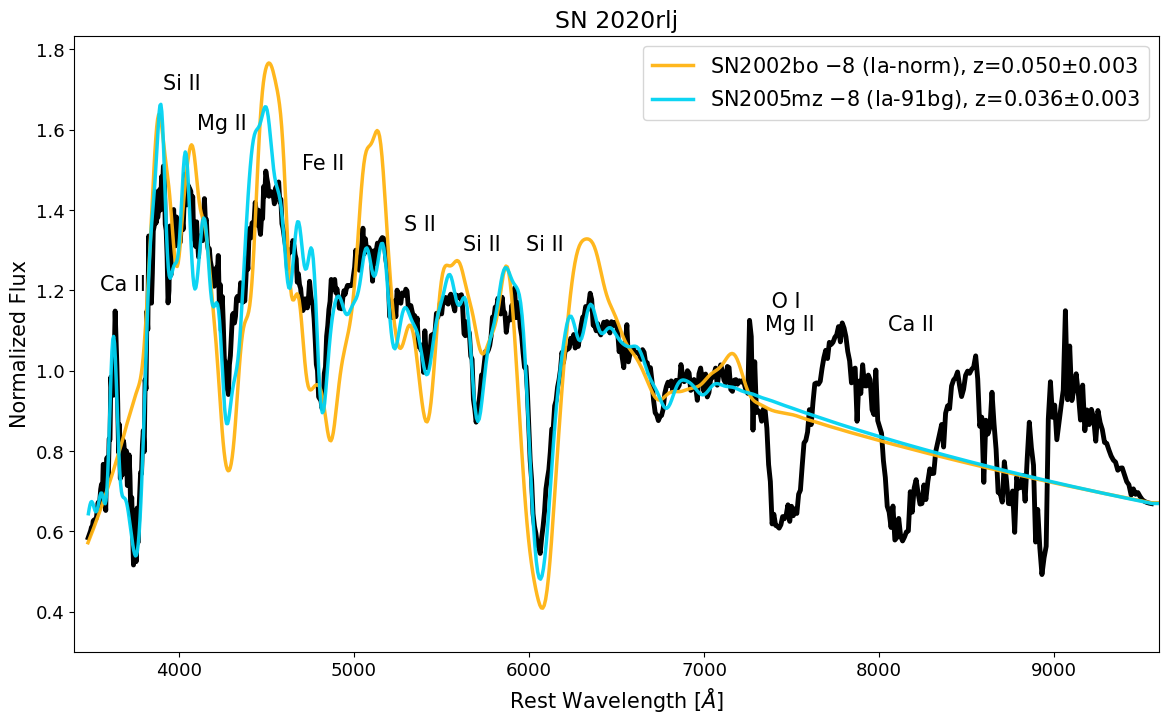

In [138]:
path='/home/lara/ICE/snid/'

#itj, jfo, jgl, jhf, kjt, kku, kyx, lao, nny, rlj
redshifts=[0.033,0.00502,0.006758,0.015371,0.038,0.085,0.031985,0.031162,0.030654,0.045]

sn='rlj'
redshift=redshifts[9]

fig,ax=plt.subplots(1,1,figsize=(14,8))

#Read files
lam00,spec00=read_table_snid(path+'SN2020'+sn+'_tellcorr_snidflux.dat')
lam,spec=restframe(lam00,spec00,redshift)

ax.plot(lam,spec,color='k',lw=3.5)

##2020itj
#snid_fits=['comp0001','comp0002']
#sn_comparison=[['SN2007Y $-$15 (Ib-norm)','SN1999ex $-$5 (Ib-norm)'],['0.035$\pm$0.004','0.042$\pm$0.006']]

##2020jfo
#snid_fits=['comp0019']
#sn_comparison=[['SN2006bp $-$6 (IIP)'],['0.006$\pm$0.013']]

##2020jgl
#snid_fits=['comp0008']
#sn_comparison=[['SN2002bo $-$12 (Ia-norm)'],['-0.006$\pm$0.009']]

##2020jhf
##snid_fits=['comp0035','comp0043','comp0046','comp0058','comp0061','comp0074']
##sn_comparison=[['SN2005mz - 8 (Ia-91bg)','SN2002er - 6 (Ia-norm)','SN2003cg - 8 (Ia-norm)','SN2002er - 8 (Ia-norm)','SN2002er - 9 (Ia-norm)','SN2003U - 9 (Ia-norm)'],['0.012$\pm$0.004','0.016$\pm$0.004','0.014$\pm$0.004','0.018$\pm$0.005','0.019$\pm$0.005','0.018$\pm$0.005']]
#snid_fits=['comp0035','comp0046','comp0074']
#sn_comparison=[['SN2005mz $-$8 (Ia-91bg)','SN2003cg $-$8 (Ia-norm)','SN2003U $-$9 (Ia-norm)'],['0.012$\pm$0.004','0.016$\pm$0.004','0.014$\pm$0.004','0.018$\pm$0.005','0.019$\pm$0.005','0.018$\pm$0.005']]

##2020kjt
##snid_fits=['comp0002','comp0004','comp0011']
##sn_comparison=[['SN2004fc + 50 (IIP)','SN2004dj + 8 (IIP)','SN2004fc + 33 (IIP)'],['0.039$\pm$0.002','0.037$\pm$0.001','0.042$\pm$0.002']]
#snid_fits=['comp0002','comp0004']
#sn_comparison=[['SN2004fc $+$50 (IIP)','SN2004dj $+$8 (IIP)'],['0.039$\pm$0.002','0.037$\pm$0.001']]

##2020kku
#snid_fits=['comp0004','comp0010','comp0015']
#sn_comparison=[['SN2005cf $-$5 (Ia-norm)','SN1990O $-$7 (Ia-norm)','SN2003du $-$8 (Ia-norm)'],['0.078$\pm$0.004','0.083$\pm$0.005','0.078$\pm$0.005']]

##2020kyx
#snid_fits=['comp0002','comp0003','comp0005']
#sn_comparison=[['SN2002bo $-$12 (Ia-norm)','SN2002bo $-$13 (Ia-norm)','SN2002bo $-$14 (Ia-norm)'],['0.040$\pm$0.005','0.040$\pm$0.005','0.041$\pm$0.006']]

##2020lao
#snid_fits=['comp0009']
#sn_comparison=[['SN2007I $+$0 (Ic-broad)'],['0.052$\pm$0.018']]

##2020nny
#snid_fits=['comp0001','comp0005']
#sn_comparison=[['SN1990e $+$19 (IIP)','SN1992H $+$12 (IIP)'],['0.033$\pm$0.004','0.037$\pm$0.007']]

#2020rlj
snid_fits=['comp0002','comp0020']
sn_comparison=[['SN2002bo $-$8 (Ia-norm)','SN2005mz $-$8 (Ia-91bg)'],['0.050$\pm$0.003','0.036$\pm$0.003']]

colors=['#FFB312','#00D3F3','#FF1300','#27D000']
#lws=[5,2.5,2.5]
k=0
for i in range(len(snid_fits)):
    #Read SNID fits
    lam_snid00,spec_snid00=read_table(path+'SN2020'+sn+'_tellcorr_'+snid_fits[i]+'_snidflux.dat')
   
    ##Resframing
    lam_snid,spec_snid=restframe(lam_snid00,spec_snid00,redshift)

    ax.plot(lam_snid,spec_snid,lw=2.5,alpha=0.95,label=sn_comparison[0][i]+', z='+sn_comparison[1][i],color=colors[i])

##Type Ia
ax.text(3750-200,1.2,'Ca II',fontsize=15)
ax.text(4130-220,1.7,'Si II',fontsize=15)
ax.text(4500-400,1.6,'Mg II',fontsize=15)
ax.text(5000-300,1.5,'Fe II',fontsize=15)
ax.text(5555-270,1.35,'S II',fontsize=15)
ax.text(5972-350,1.3,'Si II',fontsize=15)
ax.text(6355-370,1.3,'Si II',fontsize=15)
ax.text(7500-150,1.1,' O I\nMg II',fontsize=15)
ax.text(8150-100,1.1,'Ca II',fontsize=15)

##Type Ib
#ax.text(4300-150,2.1,'Fe II\nTi II',fontsize=15)
#ax.text(4471-250,1.6,'He I',fontsize=15)
#ax.text(4970-250,1.6,'Fe II\nHe I',fontsize=15)
#ax.text(5169-250,1.5,'Fe II',fontsize=15)
#ax.text(5890-300,1.5,'He I\nNa I',fontsize=15)
#ax.text(6355-300,1.45,'Si II',fontsize=15)
#ax.text(8150-100,1,'Ca II',fontsize=15)

##Type Ic
#ax.text(4300-100,1.2,'Fe II\nTi II',fontsize=15)
#ax.text(4970-200,1.18,'Fe II',fontsize=15)
#ax.text(5169-155,1.2,'Fe II\nCo II',fontsize=15)
#ax.text(5890-300,1.5,'He I\nNa I',fontsize=15)
#ax.text(6355-300,1.45,'Si II',fontsize=15)
#ax.text(8150-100,1,'Ca II',fontsize=15)

##Type II
#ax.text(4861-200,0.6,'H'+r'$\beta$',fontsize=15)
#ax.text(4924-100,1.8,'Fe II',fontsize=15,rotation=90)
#ax.text(5018-185,0.8,'Fe II',fontsize=15)
#ax.text(5169-190,0.55,'Fe II',fontsize=15)
#ax.text(6563-270,0.85,'H'+r'$\alpha$',fontsize=15)
#ax.text(8579-300,1.3,'Ca II',fontsize=15)

ax.set_xlabel('Rest Wavelength [$\AA$]',fontsize=15)
ax.set_ylabel('Normalized Flux', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim(3400,9600)
ax.set_ylim(0.3,)
plt.legend(fontsize=15)
plt.title('SN 2020'+sn,fontsize=17)

plt.savefig(path+'plots/SN2020'+sn+'_snidfits.png', format='png', dpi=300, bbox_inches = "tight")
plt.savefig(path+'plots/SN2020'+sn+'_snidfits.pdf', format='pdf', dpi=300, bbox_inches = "tight")

(None,)

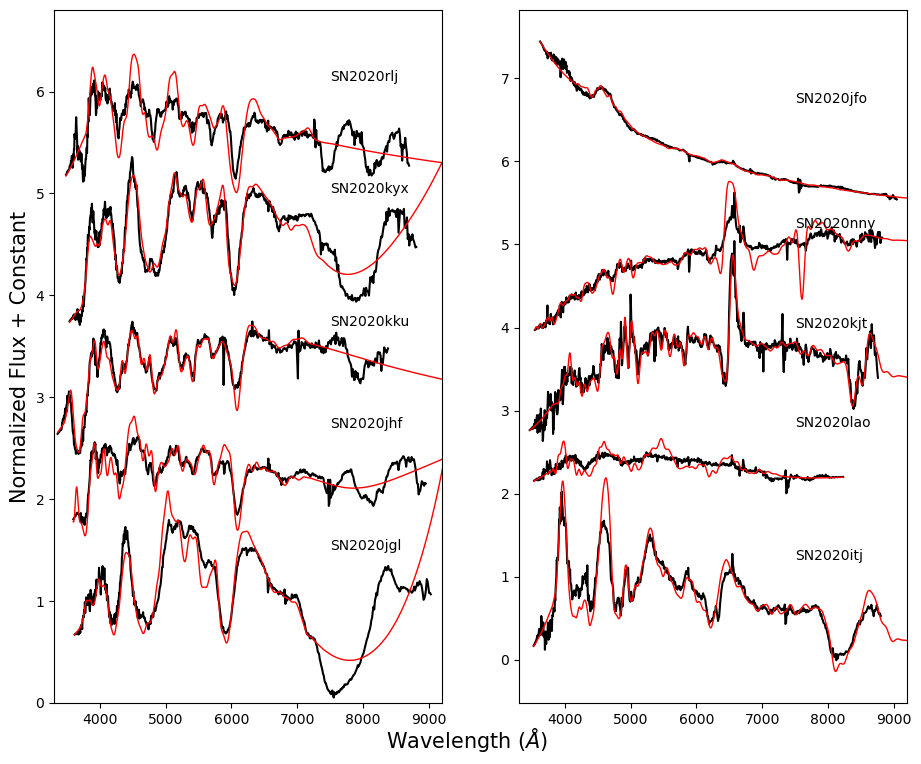

In [90]:
#path='/home/lara/ICE/Reduction/final_txt/merging/'
path='/home/lara/ICE/snid/'

files=['jgl','jhf','kku','kyx','rlj','itj','lao','kjt','nny','jfo']
redshifts=[0.006758,0.015371,0.085,0.031985,0.045,0.033,0.031162,0.038,0.030654,0.00502]
sn_type=['Ia','Ia','Ia','Ia','Ia','Ib','Ic-BL','II','II','II']
ebv=[0.0585,0.0103,0.0909,0.0768,0.1098,0.0211,0.0432,0.0462,0.0384,0.0194]
#e_ebv=[0.0016,0.0006,0.0017,0.0029,0.0036,0.0006,0.0010,0.0011,0.0006,0.0001]

snid_fits=['comp0008','comp0035','comp0004','comp0002','comp0002','comp0001','comp0009','comp0002','comp0001','comp0019']

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,9))

#j=[0,2.5e-16,5e-16,9e-16,12e-16,0,3.5e-16,8.5e-16,11.5e-16,13.5e-16]
j=[0,1.2,2.2,3.5,4.6,-0.3,1.3,2.5,3.7,5.2]

k=0
for i in range(len(files)):
    #Read files
    lam00,spec00=read_table_snid(path+'SN2020'+files[i]+'_tellcorr_snidflux.dat')
    
    #Read SNID fits
    lam_snid00,spec_snid00=read_table(path_snid+'SN2020'+files[i]+'_tellcorr_'+snid_fits[i]+'_snidflux.dat')
    
    ##MW extinction correction
    #spec0=mw_extinction_correction(lam00,spec00,ebv[i])
    #spec_snid0=mw_extinction_correction(lam_snid00,spec_snid00,ebv[i])
    #
    ##Resframing
    lam,spec=restframe(lam00,spec00,redshifts[i])
    lam_snid,spec_snid=restframe(lam_snid00,spec_snid00,redshifts[i])
    #
    ##Normalizing spectra
    #if i==0: norm=np.nanmedian(spec[(lam>4000)&(lam<9000)])
    #spec_resampled=spec*norm/np.nanmedian(spec[(lam>4000)&(lam<9000)])
    #spec_snid_resampled=spec_snid*norm/np.nanmedian(spec_snid[(lam_snid>4000)&(lam_snid<9000)])
    
    #Discarding wavelenghts longer than 9100A
    mask=(lam00<9100)
    lw,color=color_type(sn_type[i])
    
    if k<=4:
        ax1.plot(lam[mask],spec[mask]+j[i],color='k',lw=lw)
        ax1.plot(lam_snid,spec_snid+j[i],color='r',lw=1)
        #SN names
        if files[i][-1]=='1':
            ax1.text(7500,j[i]+1.5,'SN2020'+files[i][:-2],color='k',fontsize=10)
        else:
            ax1.text(7500,j[i]+1.5,'SN2020'+files[i],color='k',fontsize=10)
    else:
        ax2.plot(lam[mask],spec[mask]+j[i],color='k',lw=lw)
        ax2.plot(lam_snid,spec_snid+j[i],color='r',lw=1)
        #SN names
        if files[i][-1]=='1':
            ax2.text(7500,j[i]+1.5,'SN2020'+files[i][:-2],color='k',fontsize=10)
        else:
            ax2.text(7500,j[i]+1.5,'SN2020'+files[i],color='k',fontsize=10)
    
    k+=1
    

#ax.set_xlabel('Rest Wavelength [$\AA$]',fontsize=17)
fig.text(0.5, 0.06, 'Rest Wavelength ($\AA$)',fontsize=15, ha='center')
ax1.set_ylabel('Normalized Flux + Constant', fontsize=15)
ax1.set_ylim(0,6.8)
#ax2.set_ylim(0,2.5e-15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.ylim(-1e-17,4.3e-15)
ax1.set_xlim(3300,9200)
ax2.set_xlim(3300,9200)

plt.savefig('/home/lara/ICE/Reduction/plots/all_spectra_snid.pdf', format='pdf', dpi=300, bbox_inches = "tight"),

# Plot All

## with types and chemical elements

(-0.1, 27.905813599570433)

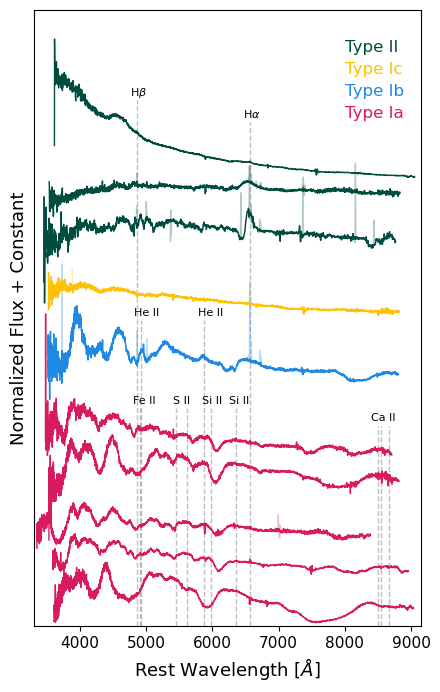

In [32]:
path='/home/lara/ICE/Reduction/final_txt/merging/'

files=['jgl','jhf','kku','kyx','rlj','itj','lao','kjt','nny','jfo']
redshifts=[0.006758,0.015371,0.085,0.031985,0.045,0.033,0.031162,0.038,0.030654,0.00502]
sn_type=['Ia','Ia','Ia','Ia','Ia','Ib','Ic-BL','II','II','II']
ebv=[0.0585,0.0103,0.0909,0.0768,0.1098,0.0211,0.0432,0.0462,0.0384,0.0194]
#e_ebv=[0.0016,0.0006,0.0017,0.0029,0.0036,0.0006,0.0010,0.0011,0.0006,0.0001]


fig,ax=plt.subplots(1,1,figsize=(5,8))

#j=[0,2.5e-16,5e-16,9e-16,12e-16,0,3.5e-16,8.5e-16,11.5e-16,13.5e-16]
j=[0,1.7,3.3,5.9,7.3,10.8,13.6,16.8,18.7,20]

#Type Ia
ax.text(8400,9.2,'Ca II',fontsize=8)
ax.vlines(x=[8498,8542,8662],ymin=-0.1,ymax=9,linewidth=1,ls='--',color='gray',alpha=0.5)
ax.text(6250,10,'Si II',fontsize=8)
ax.vlines(x=6355,ymin=-0.1,ymax=9.8,linewidth=1,ls='--',color='gray',alpha=0.5)
ax.text(5850,10,'Si II',fontsize=8)
ax.vlines(x=5972,ymin=-0.1,ymax=9.8,linewidth=1,ls='--',color='gray',alpha=0.5)
ax.text(5400,10,'S II',fontsize=8)
ax.vlines(x=[5449,5622],ymin=-0.1,ymax=9.8,linewidth=1,ls='--',color='gray',alpha=0.5)
ax.text(4800,10,'Fe II',fontsize=8)
ax.vlines(x=4900,ymin=-0.1,ymax=9.8,linewidth=1,ls='--',color='gray',alpha=0.5)

#Type Ib
ax.text(4821,14,'He II',fontsize=8)
ax.text(5776,14,'He II',fontsize=8)
ax.vlines(x=[4921,5876],ymin=-0.1,ymax=13.8,linewidth=1,ls='--',color='gray',alpha=0.5)

#Type Ib
ax.text(6463,23,'H'+r'$\alpha$',fontsize=8)
ax.vlines(x=6563,ymin=-0.1,ymax=22.8,linewidth=1,ls='--',color='gray',alpha=0.5)
ax.text(4761,24,'H'+r'$\beta$',fontsize=8)
ax.vlines(x=4861,ymin=-0.1,ymax=23.8,linewidth=1,ls='--',color='gray',alpha=0.5)

#Types
ax.text(8000,26,'Type II',fontsize=12,color='#004D40')
ax.text(8000,25,'Type Ic',fontsize=12,color='#FFC107')
ax.text(8000,24,'Type Ib',fontsize=12,color='#1E88E5')
ax.text(8000,23,'Type Ia',fontsize=12,color='#D81B60')

k=0
for i in range(len(files)):
    #Read files
    lam00,spec00=read_table(path+'SN2020'+files[i]+'_tellcorr.txt')
    if (files[i]=='itj')|(files[i]=='kjt')|(files[i]=='kku')|(files[i]=='lao')|(files[i]=='nny'):
        lam002,spec002=read_table(path+'SN2020'+files[i]+'_tellcorr_notcleaned.txt')
        spec02=mw_extinction_correction(lam002,spec002,ebv[i])
        lam2,spec2=restframe(lam002,spec02,redshifts[i])
        spec_resampled2=spec2/np.nanmedian(spec2)
        mask=(lam00<9100)
        lw,color=color_type(sn_type[i])
        ax.plot(lam2[mask],spec_resampled2[mask]+j[i],color=color,lw=lw,alpha=0.3)
    
    #MW extinction correction
    spec0=mw_extinction_correction(lam00,spec00,ebv[i])
    
    #Resframing
    lam,spec=restframe(lam00,spec0,redshifts[i])
    
    #Normalizing spectra
    #if i==0: norm=np.nanmedian(spec)
    spec_resampled=spec/np.nanmedian(spec)
    
    #Discarding wavelenghts longer than 9100A
    mask=(lam00<9100)
    lw,color=color_type(sn_type[i])

    ax.plot(lam[mask],spec_resampled[mask]+j[i],color=color,lw=lw)
    ##SN names
    #if files[i][-1]=='1':
    #    ax.text(7500,j[i]+1.5,'SN2020'+files[i][:-2],color='k',fontsize=10)
    #else:
    #    ax.text(7500,j[i]+1.5,'SN2020'+files[i],color='k',fontsize=10)
    
    k+=1


plt.tick_params(axis='y',which='both',left=False,labelleft=False)
ax.set_xlabel('Rest Wavelength [$\AA$]',fontsize=13)
ax.set_ylabel('Normalized Flux + Constant', fontsize=13)
plt.xticks(fontsize=11)
plt.xlim(3300,9150)
plt.ylim(-0.1,)


#plt.savefig('/home/lara/ICE/Reduction/plots/all_spectra.pdf', format='pdf', dpi=300, bbox_inches = "tight"),

## without types - only to show the spectrum and continuums

(None,)

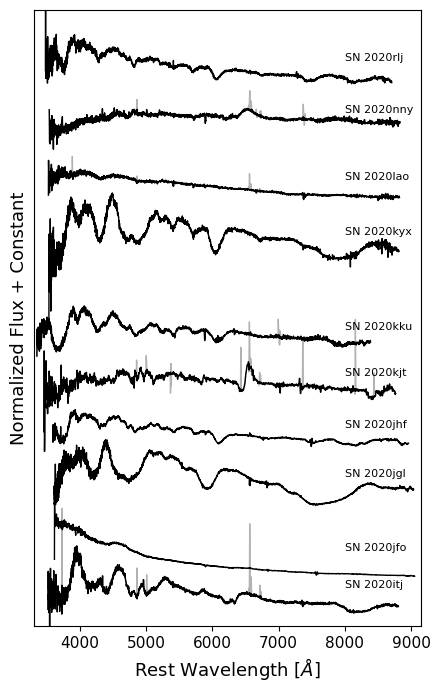

In [74]:
path='/home/lara/ICE/Reduction/final_txt/merging/'

files=['itj','jfo','jgl','jhf','kjt','kku','kyx','lao','nny','rlj']
redshifts=[0.033,0.00502,0.006758,0.015371,0.038,0.085,0.031985,0.031162,0.030654,0.045]
ebv=[0.0211,0.0194,0.0585,0.0103,0.0462,0.0909,0.0768,0.0432,0.0384,0.1098]
#e_ebv=[0.0016,0.0006,0.0017,0.0029,0.0036,0.0006,0.0010,0.0011,0.0006,0.0001]


fig,ax=plt.subplots(1,1,figsize=(5,8))

j=[0.2,1.4,3.8,5.4,7.1,8.6,11.6,13.5,15.6,17.4]

k=0
for i in range(len(files)):
    #Read files
    lam00,spec00=read_table(path+'SN2020'+files[i]+'_tellcorr.txt')
    if (files[i]=='itj')|(files[i]=='kjt')|(files[i]=='kku')|(files[i]=='lao')|(files[i]=='nny'):
        lam002,spec002=read_table(path+'SN2020'+files[i]+'_tellcorr_notcleaned.txt')
        spec02=mw_extinction_correction(lam002,spec002,ebv[i])
        lam2,spec2=restframe(lam002,spec02,redshifts[i])
        specmed2=np.nanmedian(spec2[(lam2>4500)&(lam2<5000)])
        spec_resampled2=spec2/specmed2
        mask=(lam00<9100)
        lw,color=1,'k'
        ax.plot(lam2[mask],spec_resampled2[mask]+j[i],color=color,lw=lw,alpha=0.3)
    
    #MW extinction correction
    spec0=mw_extinction_correction(lam00,spec00,ebv[i])
    
    #Resframing
    lam,spec=restframe(lam00,spec0,redshifts[i])
    
    #Normalizing spectra
    #if i==0: norm=np.nanmedian(spec)
    specmed=np.nanmedian(spec[(lam>4500)&(lam<5000)])
    spec_resampled=spec/specmed
    
    #Discarding wavelenghts longer than 9100A
    mask=(lam00<9100)

    ax.plot(lam[mask],spec_resampled[mask]+j[i],color=color,lw=lw)
    #SN names
    if (files[i]=='kyx')|(files[i]=='nny'):
        ax.text(8000,j[i]+1.05,'SN 2020'+files[i],color='k',fontsize=8)
    else:
        ax.text(8000,j[i]+0.95,'SN 2020'+files[i],color='k',fontsize=8)
    
    k+=1


plt.tick_params(axis='y',which='both',left=False,labelleft=False)
ax.set_xlabel('Rest Wavelength [$\AA$]',fontsize=13)
ax.set_ylabel('Normalized Flux + Constant', fontsize=13)
plt.xticks(fontsize=11)
plt.xlim(3300,9150)
plt.ylim(-0.1,20)


plt.savefig('/home/lara/ICE/Reduction/plots/all_spectra_nottyped.pdf', format='pdf', dpi=300, bbox_inches = "tight"),

# Calculating redshfits from host galaxy emission lines


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


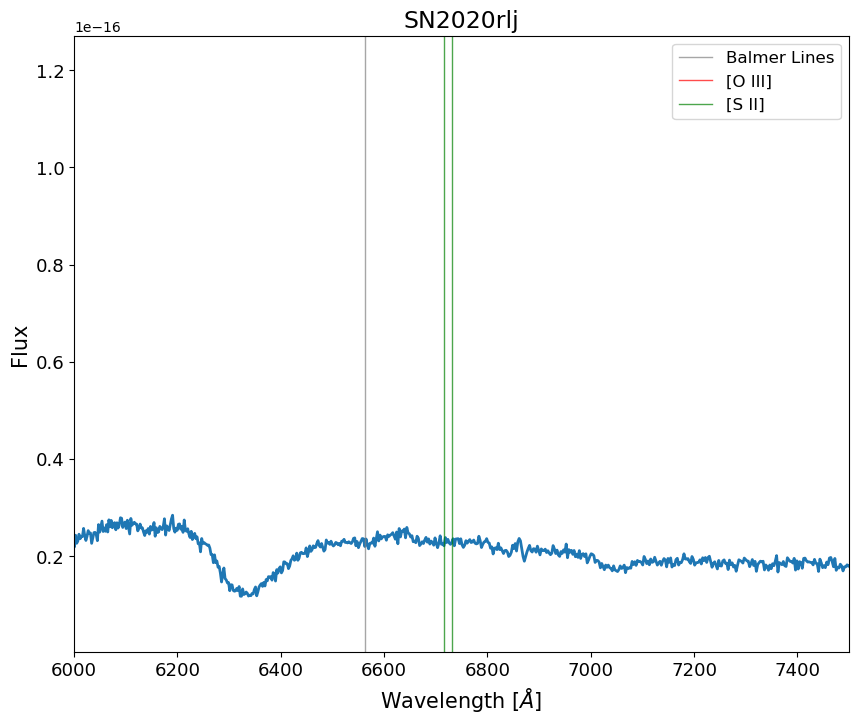

In [235]:
from specutils import Spectrum1D, SpectralRegion
import astropy.units as u
from specutils.manipulation import noise_region_uncertainty
from specutils.fitting import find_lines_threshold
from specutils.fitting import fit_generic_continuum
from astropy.modeling import models
from specutils.fitting.continuum import fit_continuum
from specutils.fitting import find_lines_derivative

path='/home/lara/ICE/Reduction/final_txt/merging/'

fig,ax=plt.subplots(1,figsize=(10,8))

#Read files
name='itj'
lam,spec=read_table(path+'SN2020'+name+'_tellcorr.txt')

spectrum = Spectrum1D(flux=spec*u.Jy, spectral_axis=lam*u.AA)

#Discarding wavelenghts longer than 9100A
mask=(lam<9100)

ax.plot(lam[mask],spec[mask],lw=2)

#Fitting continuum to subtract it
region = [(5500 * u.AA, 8500 * u.AA)]
g1_fit = fit_generic_continuum(spectrum)
y_continuum_fitted = g1_fit(lam*u.AA)

#plt.plot(lam,y_continuum_fitted)

#pdb.set_trace()
spectrum_cont_subtracted=spectrum.flux/y_continuum_fitted
#plt.plot(lam,spectrum_cont_subtracted,color='k')

new_spectrum= Spectrum1D(flux=spectrum_cont_subtracted*u.Jy, spectral_axis=lam*u.AA)

#Emission Line Finding
noise_region=SpectralRegion(6000*u.AA, 6575*u.AA)
spectrum = noise_region_uncertainty(spectrum, noise_region)
#lines = find_lines_threshold(spectrum, noise_factor=10)
lines = find_lines_derivative(new_spectrum, flux_threshold=0.5) 

#pdb.set_trace()
#print(*lines[lines['line_type'] == 'emission'])

#H-alpha
plt.axvline(x = 6562.81, color = 'gray',lw=1,alpha=0.7,label='Balmer Lines')
###H-beta
plt.axvline(x = 4861.35, color = 'gray',lw=1,alpha=0.7)
##[O III]
plt.axvline(x = 4958.911, color = 'red',lw=1,alpha=0.7,label='[O III]')
plt.axvline(x = 5006.843, color = 'red',lw=1,alpha=0.7)
##[S III]
plt.axvline(x = 6716.44, color = 'green',lw=1,alpha=0.7,label='[S II]')
plt.axvline(x = 6730.82, color = 'green',lw=1,alpha=0.7)

#plt.axvline(x = 5009.948848 , color = 'purple',lw=1,alpha=0.7,label='observed') #Hbeta
####plt.axvline(x = 5123.227501, color = 'purple',lw=1,alpha=0.7) #O III
####plt.axvline(x = 5172.481343, color = 'purple',lw=1,alpha=0.7) #O III
#plt.axvline(x = 6764.333143 , color = 'purple',lw=1,alpha=0.7) #Halpha
#plt.axvline(x = 6920.327429  , color = 'purple',lw=1,alpha=0.7) #S II
#plt.axvline(x = 6935.580089, color = 'purple',lw=1,alpha=0.7) #S II


plt.title('SN2020'+name,fontsize=17)
ax.set_xlabel('Wavelength [$\AA$]',fontsize=15)
ax.set_ylabel('Flux', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.ylim(0.5e-15,1.5e-15)
#plt.ylim(1e-15,2e-15)
#plt.xlim(4000,5500)
plt.xlim(6000,7500)
plt.legend(fontsize=12)
#plt.savefig('/home/lara/ICE/Reduction/final_txt/merging/plots_redshift/rlj_1.png', format='png', dpi=300, bbox_inches = "tight"),

In [6]:
def compute_z(lam_rest,lam_obs):
    z=(lam_obs-lam_rest)/lam_rest
    return z

In [15]:
#H-beta, [O III] 1, [O III] 2, Na I D, H-alpha, [S II] 1, [S II] 2
#lam_rest=[4861.35,4958.911,5006.843,5893,6562.81,6716.44,6730.82]
lam_rest=[4861.35,5893,6562.81,6716.44,6730.82]

lam_obs=[5010.28,6074.94,6765.18,6922.74,6937.57]

z_all=[]
for i in range(len(lam_rest)):
    z_all.append(compute_z(lam_rest[i],lam_obs[i]))

z_all=np.array(z_all)
print(z_all)
print(str(np.round(np.nanmean(z_all),5))+'+/-'+str(np.round(np.nanstd(z_all),5)))


[0.03063552 0.03087392 0.03083588 0.03071568 0.03071691]
0.03076+/-9e-05


# Check Clean Spectra

(None,)

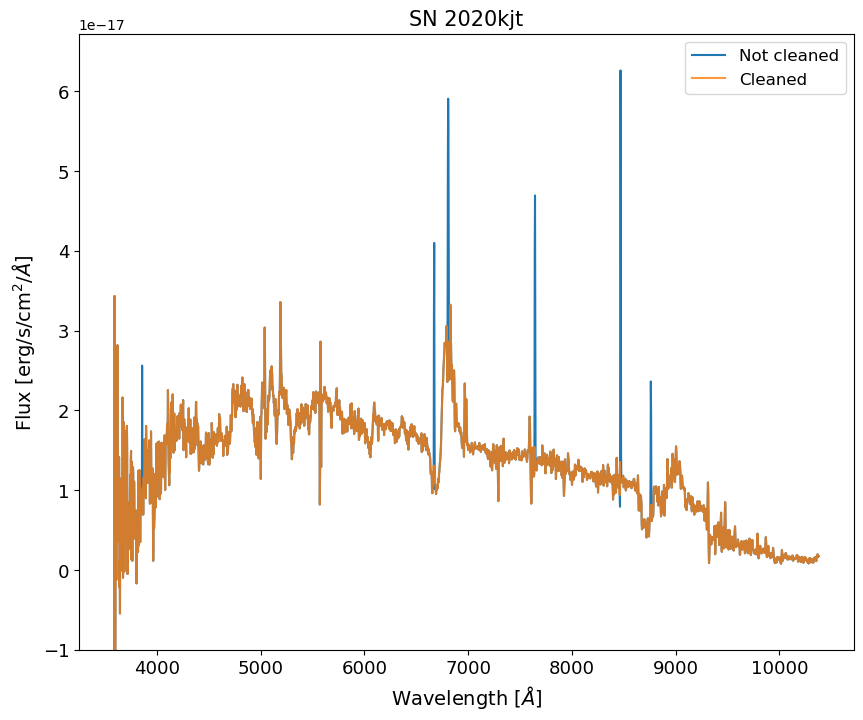

In [251]:
from scipy.interpolate import BSpline, make_interp_spline
from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth

path='/home/lara/ICE/Reduction/final_txt/merging/'


#Read files
lam0,spec0=read_table(path+'SN2020kjt_tellcorr_notcleaned.txt')
lam,spec=read_table(path+'SN2020kjt_tellcorr.txt')

fig,ax=plt.subplots(1,figsize=(10,8))


plt.plot(lam0,spec0,label='Not cleaned')
plt.plot(lam,spec,label='Cleaned',alpha=0.8)
plt.title('SN 2020kjt',fontsize=15)

#spec1_bsmooth = box_smooth(spec1, width=25)
#spec1_gsmooth = gaussian_smooth(spec1, stddev=25)
#spec1_tsmooth = trapezoid_smooth(spec1, width=25)
#
#plt.plot(spec1_bsmooth.spectral_axis,spec1_bsmooth.flux,label='Box')
#plt.plot(spec1_gsmooth.spectral_axis,spec1_gsmooth.flux,label='Gaussian')
#plt.plot(spec1_tsmooth.spectral_axis,spec1_tsmooth.flux,label='Trapezoid')

plt.legend(fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('Flux [erg/s/cm$^2$/$\AA$]',fontsize=14)
plt.ylim(-1e-17)

plt.savefig('/home/lara/ICE/Reduction/final_txt/merging/not_telluric_corrected/kjt_telluriccorrection.png', format='png', dpi=300, bbox_inches = "tight"),

# Merging R1000B and R1000R

In [5]:
def open_table(path_b,path_r):
    blue=Table.read(path_b,format='ascii')
    red=Table.read(path_r,format='ascii')
    
    blam=np.array(blue['col1'])
    bspec=np.array(blue['col2'])
    rlam=np.array(red['col1'])
    rspec=np.array(red['col2'])
    
    return blam,bspec,rlam,rspec

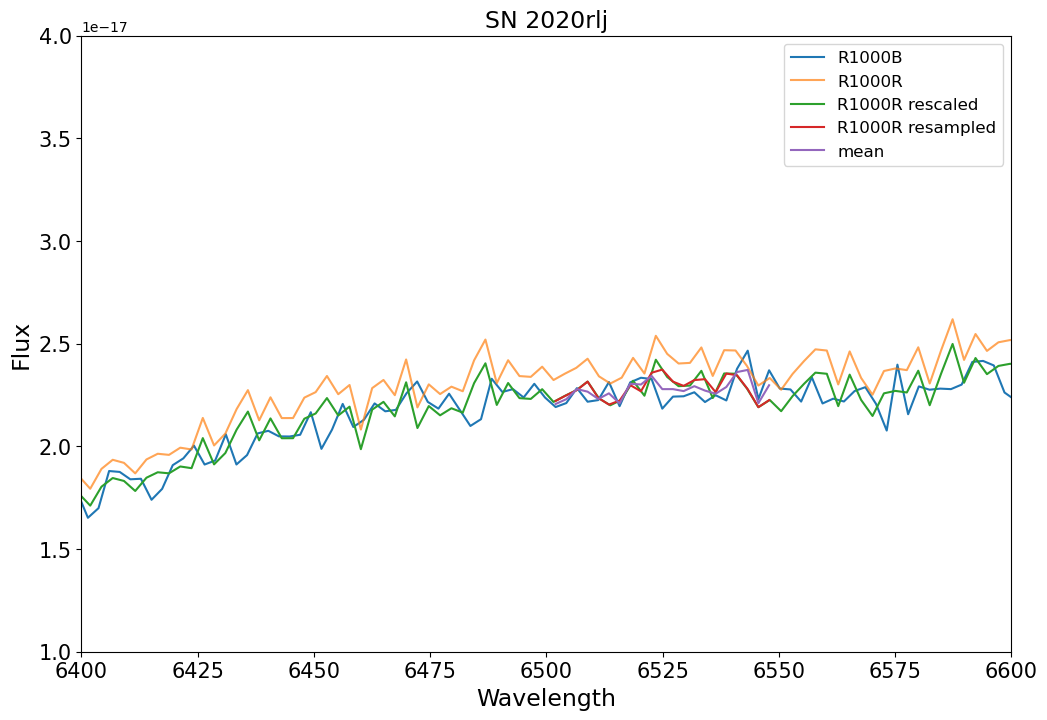

In [131]:
path='/home/lara/ICE/Reduction/final_txt/fits_to_txt/'
path1='/home/lara/ICE/Reduction/final_txt/fits_to_txt/telluric_corrected/'
blam,bspec,rlam,rspec=open_table(path+'SN2020rlj_R1000B.txt',path1+'SN2020rlj_R1000R_tellcorr.txt')

fig,ax=plt.subplots(1,figsize=(12,8))

ax.plot(blam,bspec,label='R1000B')
#flux=mw_extinction_correction(blam,bspec,0.0432)
#ax.plot(blam,flux,label='Av corrected')

ax.plot(rlam,rspec,label='R1000R',alpha=0.7)
plt.axvline(x = 6000, color = 'k')
plt.axvline(x = 7000, color = 'k')
##
norm=np.nanmedian(bspec[(blam>6000)&(blam<7000)])
rspec_resampled=rspec*norm/np.nanmedian(rspec[(rlam>6000)&(rlam<7000)])
ax.plot(rlam,rspec_resampled,label='R1000R rescaled')
##
bmask=(blam>=6500)&(blam<=6550)
rmask=(rlam>=6500)&(rlam<=6550)
new_rspec=spectres(blam[bmask],rlam[rmask],rspec_resampled[rmask])
ax.plot(blam[bmask],new_rspec,label='R1000R resampled')
##
#new_bspec_2=spectres(blam,blam_2,bspec_2_resampled)
#ax.plot(blam,new_bspec_2,label='R1000R 2 resampled')
#
spec_comb=np.nanmean([bspec[bmask],new_rspec],axis=0)
ax.plot(blam[bmask],spec_comb,label='mean')
#
#pdb.set_trace()

plt.xlim(6400,6600)
#plt.xlim(6000,7000)
plt.ylim(0.1e-16,0.4e-16)
plt.title('SN 2020rlj',fontsize=17)
plt.ylabel('Flux',fontsize=17)
plt.xlabel('Wavelength',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.savefig('/home/lara/ICE/Reduction/final_txt/merging/plots/rlj_zoom.jpg', format='jpg', dpi=300, bbox_inches = "tight")

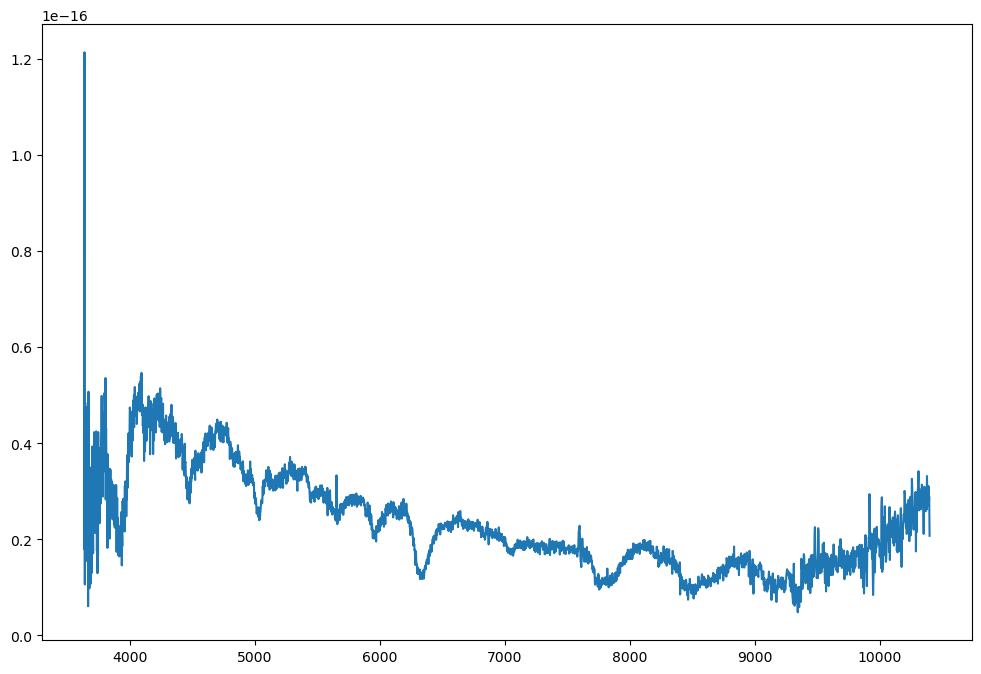

In [132]:
lam=np.concatenate((blam[blam<6550],rlam[rlam>6550]),axis=0)
spec=np.concatenate((bspec[blam<6500],spec_comb,rspec_resampled[rlam>6550]),axis=0)

fig,ax=plt.subplots(1,figsize=(12,8))
ax.plot(lam,spec)

file=np.array([lam,spec])
file=file.T

#plt.xlim(3500,4000)
##plt.xlim(6000,7000)
#plt.ylim(0.2e-16,0.4e-16)

with open('/home/lara/ICE/Reduction/final_txt/merging/SN2020rlj_tellcorr.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%e'])

# SNe type Ia vs. SN2011fe

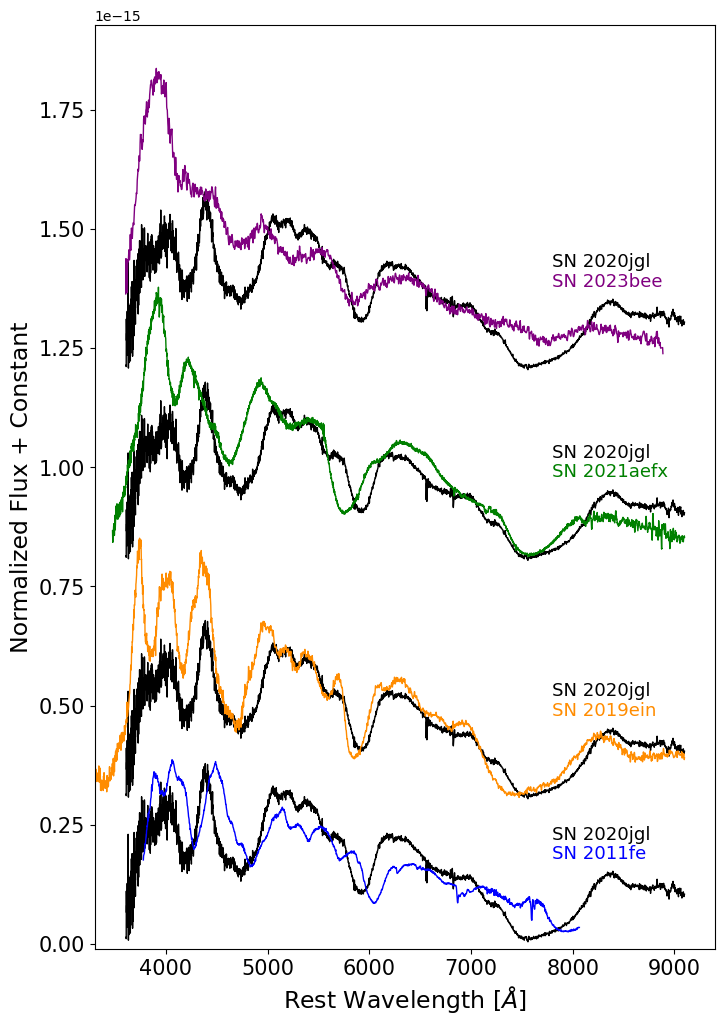

In [17]:
path='/home/lara/ICE/'

#files=['Reduction/merging/SN2020jgl_1.txt','Reduction/merging/SN2020jhf.txt','Reduction/merging/SN2020kku.txt','Reduction/merging/SN2020kyx.txt','Reduction/merging/SN2020rlj.txt','spectra_series/2011fe_11kly_20110824_LT_v1.wise','spectra_series/2011fe_11kly_20110825_Lick3-m_v1.wise','spectra_series/2011fe_11kly_20110825_TNG_v1.wise'] #Type Ia
files=['Reduction/final_txt/merging/SN2020jgl_tellcorr.txt','spectra_series/2011fe_11kly_20110825_TNG_v1.wise','Reduction/final_txt/merging/SN2020jgl_tellcorr.txt','spectra_series/at2019ein_20190502_redblu_065414.777aa.ascii','Reduction/final_txt/merging/SN2020jgl_tellcorr.txt','spectra_series/SN2021aefx_20211111_203728_SALT_v1.ascii','Reduction/final_txt/merging/SN2020jgl_tellcorr.txt','spectra_series/SN2023bee_20230201_181839_Lijiang-24m_v1.ascii'] #Type Ia

#z=[0.006758,0.015371,0.085,0.031985,0.045,0.00080,0.00080,0.00080]

#2011fe: z= 0.00080
#2019ein: z= 0.00775
#2021aefx: z= 0.005
#2023bee: z= 0.006698

z=[0.006758,0.00080,0.006758,0.00775,0.006758,0.005,0.006758,0.006698]


#text=['SN2020jgl','SN2020jhf','SN2020kku','SN2020kyx','SN2020rlj','SN2011fe\nLT + FRODOSpec','SN2011fe\nLick + Kast','SN2011fe\nTNG + Dolores']
#colors=['k','k','k','k','k','green','red','blue']
text=['SN 2020jgl','SN 2011fe','SN 2020jgl','SN 2019ein','SN 2020jgl','SN 2021aefx','SN 2020jgl','SN 2023bee']
colors=['k','blue','k','darkorange','k','green','k','purple']
fig,ax=plt.subplots(1,figsize=(8,12))

#j=[0,2e-16,5.3e-16,8e-16,10e-16,12.5e-16,17e-16,20e-16]
j=[0,0,3e-16,3e-16,8e-16,8e-16,12e-16,12e-16]
k=[2.2e-16,1.8e-16,2.2e-16,1.8e-16,2.2e-16,1.8e-16,2.2e-16,1.8e-16]

for i in range(len(files)):
    lam0,spec0=read_table(path+files[i])
    lam,spec=restframe(lam0,spec0,z[i])

    if i==0: norm=np.nanmedian(spec[(lam>4000)&(lam<9000)])
    spec_resampled=spec*norm/np.nanmedian(spec[(lam>4000)&(lam<9000)])
    #
    if i==7:
        tmplam2=lam[10:]
        deltalam=tmplam2[2]-tmplam2[1]
        #pdb.set_trace()
        # std defined for a spectral resolution of 1000 at 1.5 microns (1.5 / 1000 * 1 pixel / deltalam)
        std=0.3
        std1=std/deltalam
        gauss1=Gaussian1DKernel(std1)
        # Boxcar width was defined arbitrarily from the gaussian std
        gauss1=Box1DKernel(std1*15)
        #pdb.set_trace()
        # Convolve the spectrum with the build kernel -> smoothed spectrum
        spec_resampled=convolve(spec_resampled,gauss1,normalize_kernel=True)
        
        #mask=((lam>3985)&(lam<5780))
        #ax.plot(lam[mask],spec_resampled[mask]+j[i],color=colors[i],lw=1)
        #mask=(((lam>5840)&(lam<9100)))
        #ax.plot(lam[mask],spec_resampled[mask]+j[i],color=colors[i],lw=1)
        #ax.text(7800,j[i]+1.5e-16,text[i],color=colors[i],fontsize=13)
        
        mask=(lam<9100)
        ax.plot(lam[mask],spec_resampled[mask]+j[i],color=colors[i],lw=1)
        ax.text(7800,j[i]+k[i],text[i],color=colors[i],fontsize=13)
    else:
        mask=(lam<9100)
        ax.plot(lam[mask],spec_resampled[mask]+j[i],color=colors[i],lw=1)
        ax.text(7800,j[i]+k[i],text[i],color=colors[i],fontsize=13)
    

ax.set_xlabel('Rest Wavelength [$\AA$]',fontsize=17)
ax.set_ylabel('Normalized Flux + Constant', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-1e-17,)
plt.xlim(3300,)
plt.savefig('/home/lara/ICE/paper/jgl_vs_11fe_19ein_21aefx_23bee.png', format='png', dpi=300, bbox_inches = "tight")

# SN2020jgl vs. SN2023bee

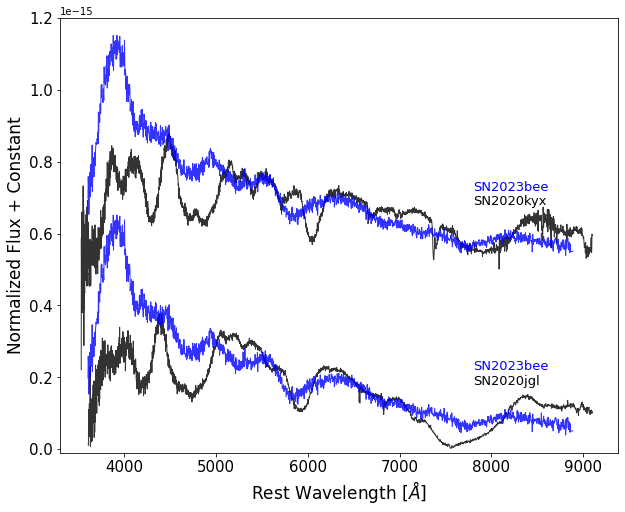

In [184]:
path='/home/lara/ICE/'

files=['Reduction/merging/SN2020jgl_1.txt','spectra_series/SN2023bee_20230201_181839_Lijiang-24m_v1.ascii','Reduction/merging/SN2020kyx.txt','spectra_series/SN2023bee_20230201_181839_Lijiang-24m_v1.ascii'] #Type Ia
z=[0.006758,0.006698,0.031985,0.006698]

text=['SN2020jgl','SN2023bee','SN2020kyx','SN2023bee']
fig,ax=plt.subplots(1,figsize=(10,8))

j=[0,0,5e-16,5e-16]
k=[1.8e-16,2.2e-16,1.8e-16,2.2e-16]
for i in range(len(files)):
    lam,spec=read_table_rest(path+files[i],z[i])
    
    if i==0: norm=np.nanmedian(spec[(lam>4000)&(lam<9000)])
    spec_resampled=spec*norm/np.nanmedian(spec[(lam>4000)&(lam<9000)])
    
    mask=(lam<9100)
    ax.plot(lam[mask],spec_resampled[mask]+j[i],color=colors[i],lw=1,alpha=0.8)
    ax.text(7800,j[i]+k[i],text[i],color=colors[i],fontsize=13)
    

ax.set_xlabel('Rest Wavelength [$\AA$]',fontsize=17)
ax.set_ylabel('Normalized Flux + Constant', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-1e-17,1.2e-15)
plt.xlim(3300,)
#plt.savefig('/home/lara/ICE/Reduction/jgl_kyx_vs_SN2023bee.jpg', format='jpg', dpi=300, bbox_inches = "tight")